## Task: Read a txt file in Python

There are many ways to read and write files. Instead of importing a library (e.g. Pandas), we will use Python's built-in ***open*** function to get a file object.

The syntax to open a file object in Python is: <br>
`file_object  = open(“filename”, “mode”)` <br>
***File_object*** is the variable you're assigning the file to and ***mode*** tells the interpreter how to use the file: 

- ‘r’ – Read mode
- ‘w’ – Write mode (edit and write new information to the file)
- ‘a’ – Append mode (add new data to the end of the file)
- ‘r+’ – Special read and write mode (handle both actions when working with a file)

In [1]:
external_sites = open('../data/external_sites.txt', 'r')

In [3]:
external_sites_list = external_sites.read().splitlines()

In [8]:
url_list = []
for row in external_sites_list:
    url_list.append("https://" + row)

In [9]:
url_list

['https://abc.jpl.nasa.gov',
 'https://abclab.jpl.nasa.gov',
 'https://acce-ops.jpl.nasa.gov',
 'https://acce.jpl.nasa.gov',
 'https://accellion.jpl.nasa.gov',
 'https://acquisition.jpl.nasa.gov',
 'https://acquisitions.jpl.nasa.gov',
 'https://aeolus.jpl.nasa.gov',
 'https://aggregate.jpl.nasa.gov',
 'https://ai.jpl.nasa.gov',
 'https://airbornescience.jpl.nasa.gov',
 'https://airflip.jpl.nasa.gov',
 'https://airsar-t.jpl.nasa.gov',
 'https://airsar.jpl.nasa.gov',
 'https://airsnrt.jpl.nasa.gov',
 'https://airsteam.jpl.nasa.gov',
 'https://airswot.jpl.nasa.gov',
 'https://aitest.jpl.nasa.gov',
 'https://aiweb.jpl.nasa.gov',
 'https://akana-ext.jpl.nasa.gov',
 'https://akana-intext.jpl.nasa.gov',
 'https://alhat.jpl.nasa.gov',
 'https://amfs1-webdav.jpl.nasa.gov',
 'https://amfs1.jpl.nasa.gov',
 'https://ammos.jpl.nasa.gov',
 'https://analogs.jpl.nasa.gov',
 'https://ao.jpl.nasa.gov',
 'https://appell.jpl.nasa.gov',
 'https://apps-ldt.jpl.nasa.gov',
 'https://apps-sishub.jpl.nasa.gov',

## Task: Use `requests.get()` to call on all URLs to get the response code

First, let's build out our script for `requests.get()`

In [6]:
import requests

In [10]:
r = requests.get('https://abclab.jpl.nasa.gov')

In [11]:
r.status_code

200

Awesome! Now let's put it all together using a for-loop. We want to have ***one*** chunk of code that does all the work for us.

In [26]:
status_code_list = []
for row in url_list:
    try:
        r = requests.get(row)
        status_code_list.append(r.status_code)
        print("Success for " + row)
    except:
        status_code_list.append("ERROR")
        print("Error for " + row)

Success for https://abc.jpl.nasa.gov
Success for https://abclab.jpl.nasa.gov
Success for https://acce-ops.jpl.nasa.gov
Success for https://acce.jpl.nasa.gov
Success for https://accellion.jpl.nasa.gov
Success for https://acquisition.jpl.nasa.gov
Success for https://acquisitions.jpl.nasa.gov
Success for https://aeolus.jpl.nasa.gov
Success for https://aggregate.jpl.nasa.gov
Error for https://ai.jpl.nasa.gov
Success for https://airbornescience.jpl.nasa.gov
Success for https://airflip.jpl.nasa.gov
Success for https://airsar-t.jpl.nasa.gov
Success for https://airsar.jpl.nasa.gov
Success for https://airsnrt.jpl.nasa.gov
Success for https://airsteam.jpl.nasa.gov
Success for https://airswot.jpl.nasa.gov
Error for https://aitest.jpl.nasa.gov
Error for https://aiweb.jpl.nasa.gov
Success for https://akana-ext.jpl.nasa.gov
Success for https://akana-intext.jpl.nasa.gov
Success for https://alhat.jpl.nasa.gov
Success for https://amfs1-webdav.jpl.nasa.gov
Success for https://amfs1.jpl.nasa.gov
Success 

In [108]:
type(status_code_list)

list

In [109]:
type(url_list)

list

In [51]:
for i in range(0,50):
    url_response_dict = {
        'website': url_list,
        'status_code': status_code_list
    }

## Task: Export dictionary

In [54]:
from sklearn.externals import joblib

In [55]:
joblib.dump(url_response_dict, '../data/url_response_dict')

['../data/url_response_dict']

# Display the dictionary in a dataframe format
Using Pandas.

In [36]:
import pandas as pd

In [52]:
pd.DataFrame(url_response_dict)

,status_code,website
0,200,https://abc.jpl.nasa.gov
1,200,https://abclab.jpl.nasa.gov
2,200,https://acce-ops.jpl.nasa.gov
3,200,https://acce.jpl.nasa.gov
4,200,https://accellion.jpl.nasa.gov
5,200,https://acquisition.jpl.nasa.gov
6,200,https://acquisitions.jpl.nasa.gov
7,200,https://aeolus.jpl.nasa.gov
8,200,https://aggregate.jpl.nasa.gov
9,ERROR,https://ai.jpl.nasa.gov


In [57]:
url_response_df = pd.DataFrame(url_response_dict)

Now that you have your results in a dataframe, you can do analysis of your data (just like anything you would do in Excel).

In [67]:
url_response_df.groupby(['status_code']).count()

,website
status_code,
200,34
401,4
403,3
500,1
503,2
ERROR,6


In [68]:
url_response_df = url_response_df.groupby(['status_code']).count()

In [72]:
url_response_df.sort_values(['website'], ascending=False)

,website
status_code,
200,34
ERROR,6
401,4
403,3
503,2
500,1


# Graph using matplotlib

In [94]:
url_response_graph = url_response_df.sort_values(['website'], ascending=False).reset_index()

In [95]:
url_response_graph

,status_code,website
0,200,34
1,ERROR,6
2,401,4
3,403,3
4,503,2
5,500,1


In [96]:
import matplotlib.pyplot as plt
import numpy as np

In [97]:
y_pos = np.arange(len(url_response_graph))

In [98]:
y_pos

array([0, 1, 2, 3, 4, 5])

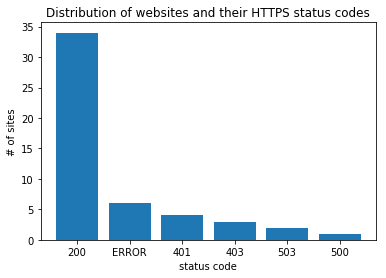

In [106]:
plt.bar(y_pos, url_response_graph['website'])
plt.xticks(y_pos, url_response_graph['status_code'])
plt.ylabel('# of sites')
plt.xlabel('status code')
plt.title('Distribution of websites and their HTTPS status codes')
plt.show()

In [107]:
pd.read_excel('../data/https_status_codes.xlsx')

,Code,Description
0,100,Continue
1,101,Switching Protocols
2,102,Processing
3,200,OK
4,201,Created
5,202,Accepted
6,203,Non-authoritative Information
7,204,No Content
8,205,Reset Content
9,206,Partial Content
